In [1]:
%autosave 0
import pandas as pd
import glob
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date, timedelta
import shutil

from sklearn.metrics import mean_absolute_error, mean_squared_error

Autosave disabled


In [2]:
path = r'C:\Users\utilisateur\0-DataScience\Formation-P2\Covid-19\AzureSC\Rapport'
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=0, header=0)
    li.append(df)
    os.unlink(filename)

frame = pd.concat(li, axis=0, ignore_index=True)
frame

,date,country,total_cases_predict,total_cases_real,total_deaths_predict,total_deaths_real,error_abs_cases,error_abs_deaths
0,2020-03-29,France,37972.0,37575.0,2517.0,2314.0,397.0,203.0
1,2020-03-29,China,82472.0,82342.0,3304.0,3306.0,130.0,-2.0
2,2020-03-29,Italy,93505.0,92472.0,10092.0,10023.0,1033.0,69.0
3,2020-03-29,Spain,74605.0,72248.0,5565.0,5690.0,2357.0,-125.0
4,2020-03-29,United States,128133.0,124665.0,2201.0,2191.0,3468.0,10.0
...,...,...,...,...,...,...,...,...
830,2020-06-30,United Kingdom,312439.0,311965.0,43705.0,43575.0,474.0,130.0
831,2020-06-30,Germany,194112.0,194259.0,8974.0,8973.0,-147.0,1.0
832,2020-06-30,Iran,225675.0,225205.0,10705.0,10670.0,470.0,35.0
833,2020-06-30,Turkey,198510.0,198613.0,5113.0,5115.0,-103.0,-2.0


In [3]:
def showMetricsGeneral(subject):
    print(f"-- Global performances for {subject} --")
    MAPE =mean_absolute_error(frame[f'total_{subject}_real'],frame[f'total_{subject}_predict']) 
    print("MAPE = ",MAPE)
    RMSE = mean_squared_error(frame[f'total_{subject}_real'],frame[f'total_{subject}_predict'], squared=False)
    print("RMSE = ",RMSE)

In [4]:
showMetricsGeneral("cases")

-- Global performances for cases --
MAPE =  2565.102994011976
RMSE =  6139.405695067134


In [5]:
showMetricsGeneral("deaths")

-- Global performances for deaths --
MAPE =  321.3556886227545
RMSE =  733.2036307001325


In [6]:
def visFollow(country,subject):
    df = frame[frame['country'].isin([f"{country}"])]
    list_value_predict = df[f"total_{subject}_predict"]
    list_value_real = df[f"total_{subject}_real"]
    
    print(f"-- {country} performances for {subject} --")
    MAPE =mean_absolute_error(list_value_real,list_value_predict) 
    print("MAPE = ",MAPE)
    RMSE = mean_squared_error(list_value_real,list_value_predict, squared=False)
    print("RMSE = ",RMSE)
    
    this_graf = plt.plot(df["date"], list_value_predict, 'go--', 
                         linewidth=2, markersize=12,label=f'{subject} predict')
    this_graf = plt.plot(df["date"], list_value_real, color='red',
                         marker='o',linewidth=2, markersize=12,label=f'{subject} real')
    this_graf =plt.title(f"{country}")
    plt.legend()
    plt.xticks(rotation=70)
    return this_graf

def visMetrics(country):
    vv = frame[frame['country'].isin([f"{country}"])]
    plt.plot(vv["error_abs_cases"],marker='o',label="error_abs_cases",color='blue',markersize=12)
    plt.plot(vv["error_abs_deaths"],marker='o',label="error_abs_deaths",color='orange',markersize=12)
    plt.title("Abs error over time")
    plt.legend()

def visShow(country):
    f0 = plt.figure(figsize=(20,10))
#     ax1 = plt.subplot(1,2,1)
    v = visFollow(f"{country}","cases")
    f1 = plt.figure(figsize=(20,10))
#     ax2 = f1.add_subplot(1,2,2)
    v = visFollow(f"{country}","deaths")
    f2 = plt.figure(figsize=(20,10))
#     ax3 = f2.add_subplot(1,2,1)
    v = visMetrics(country)

-- World performances for cases --
MAPE =  13035.292682926829
RMSE =  16430.55386742163
-- World performances for deaths --
MAPE =  1619.4512195121952
RMSE =  1967.2640807513958


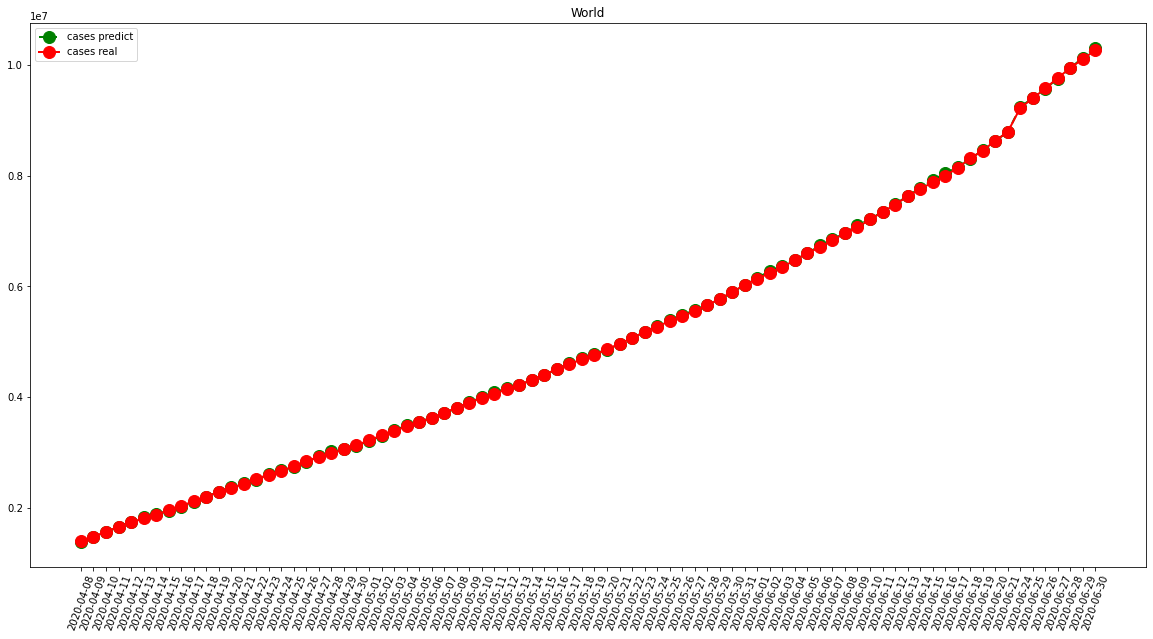

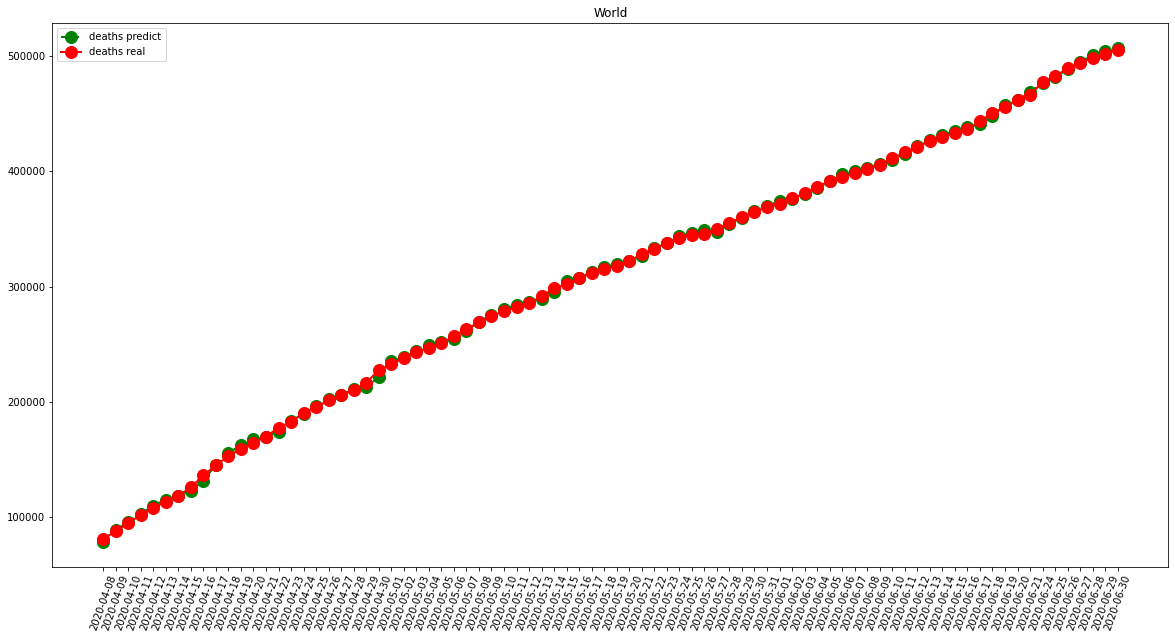

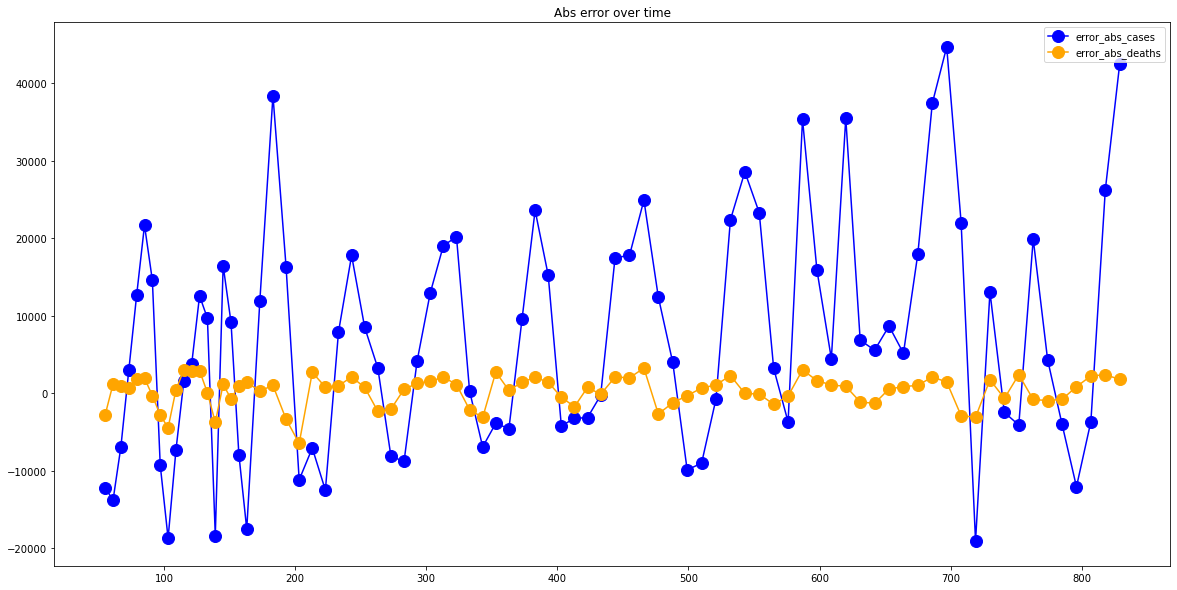

In [7]:
visShow("World")

-- France performances for cases --
MAPE =  911.9673913043479
RMSE =  1500.4542319490831
-- France performances for deaths --
MAPE =  190.6086956521739
RMSE =  349.1780721737213


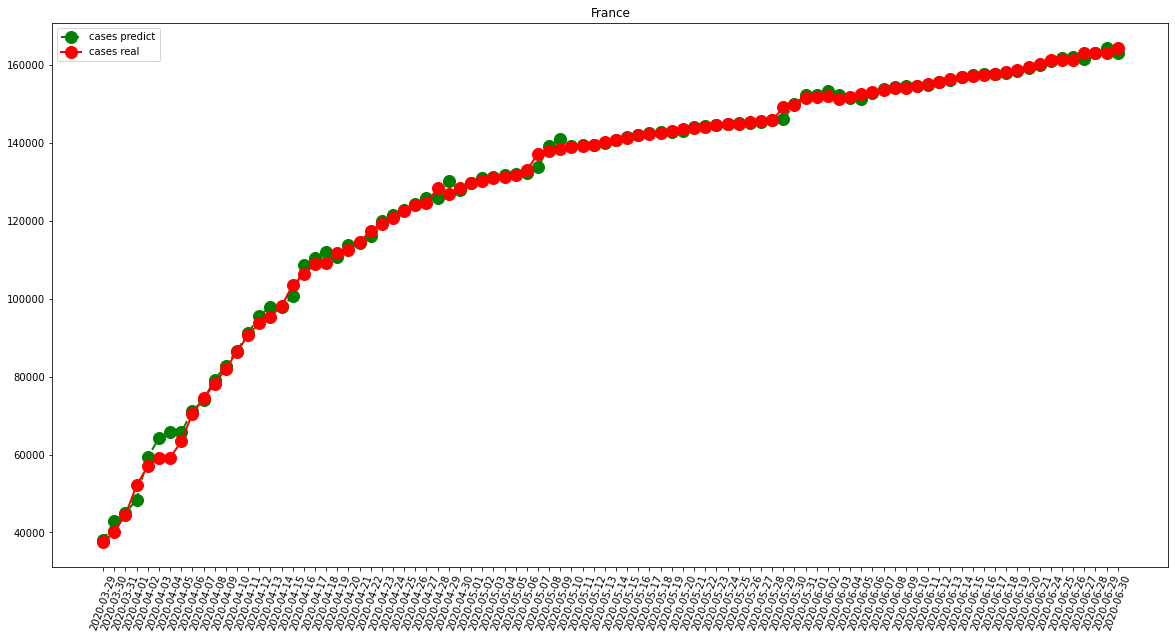

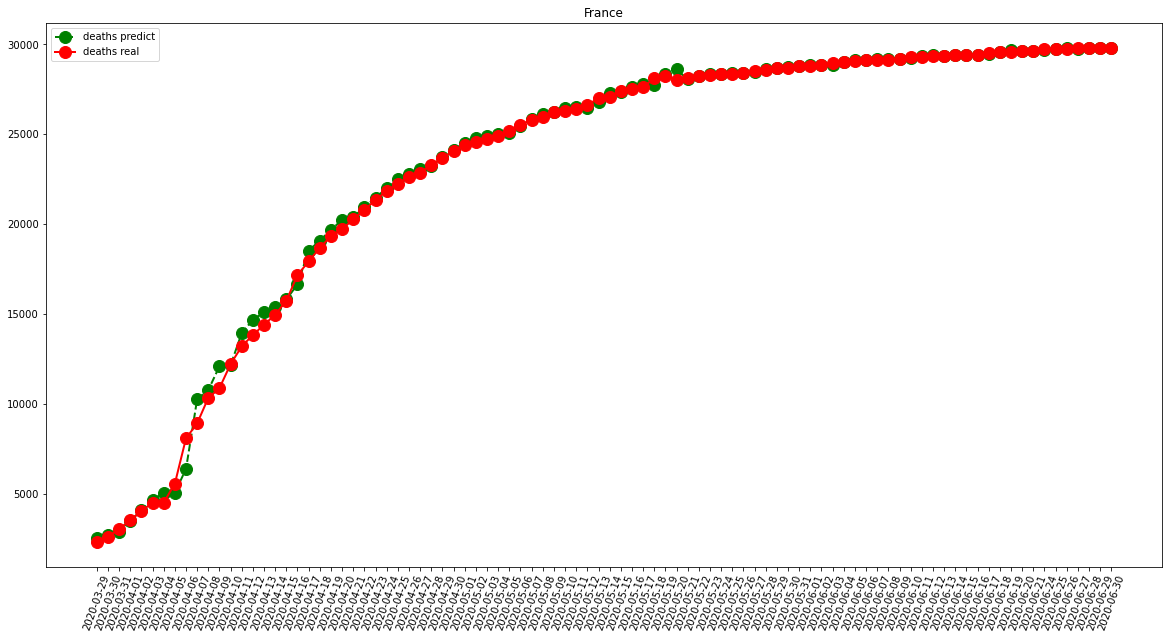

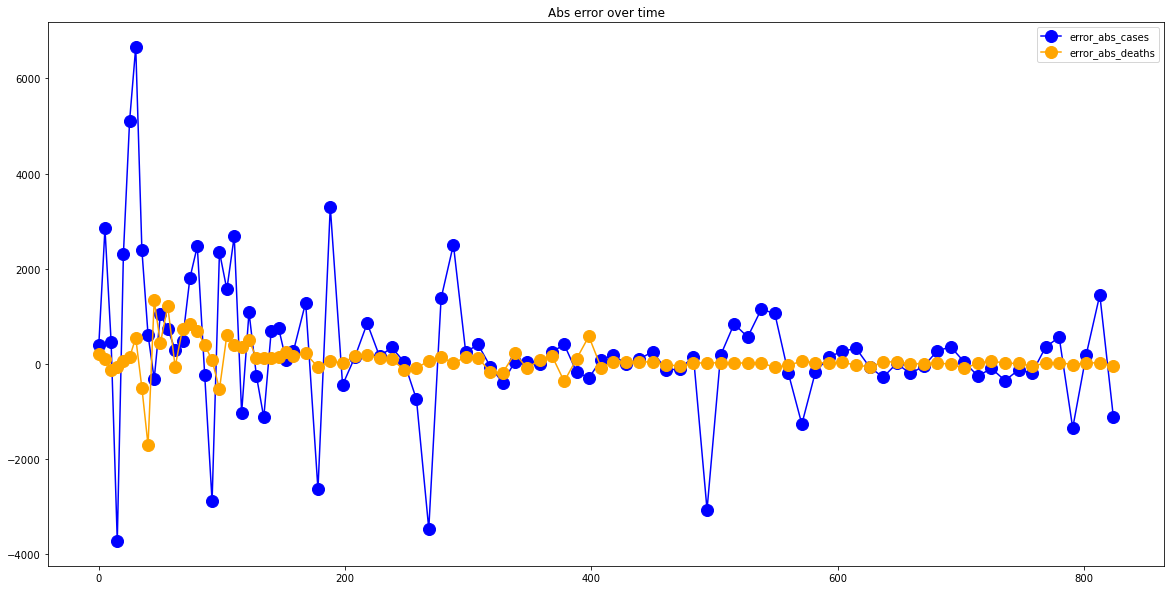

In [8]:
visShow("France")

-- Italy performances for cases --
MAPE =  393.4021739130435
RMSE =  564.1861683954115
-- Italy performances for deaths --
MAPE =  103.92391304347827
RMSE =  308.2274886875093


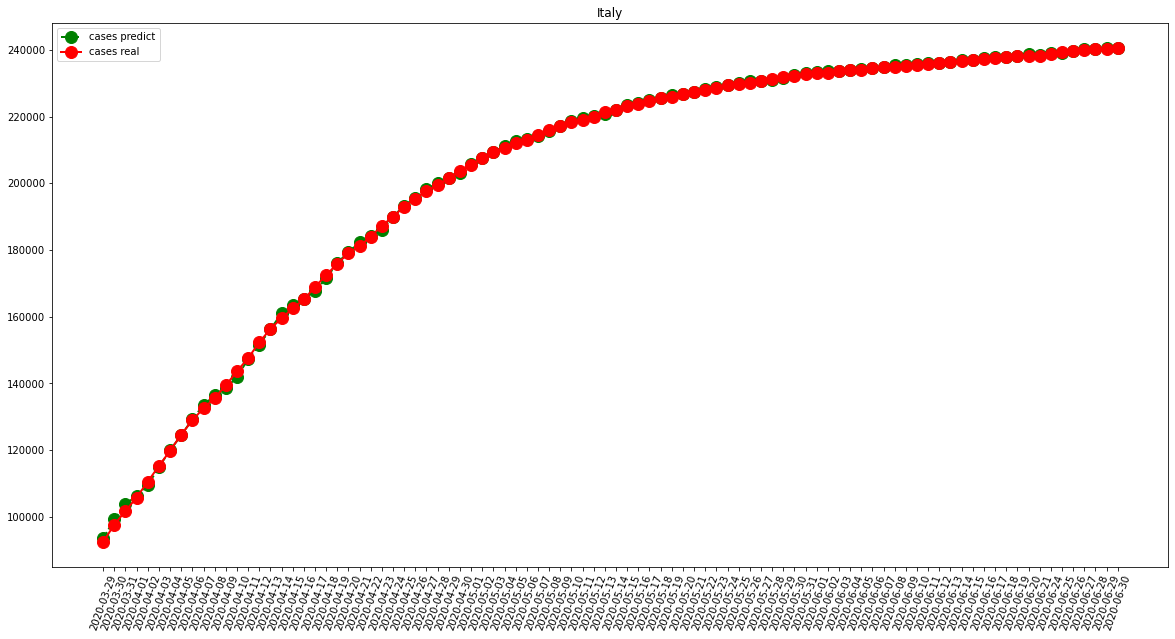

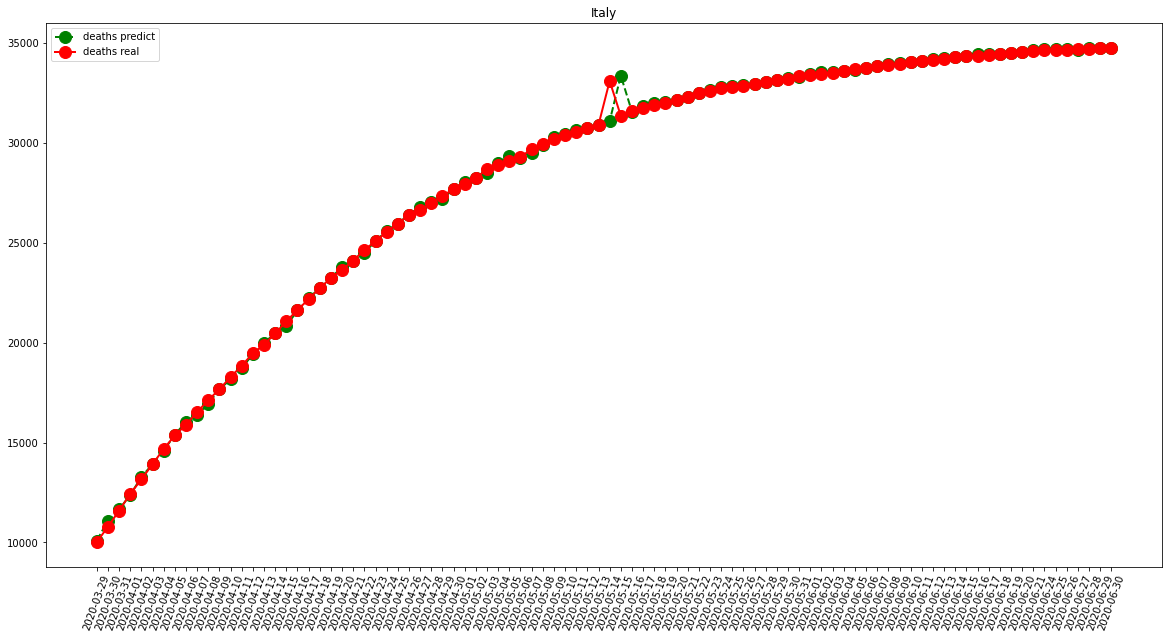

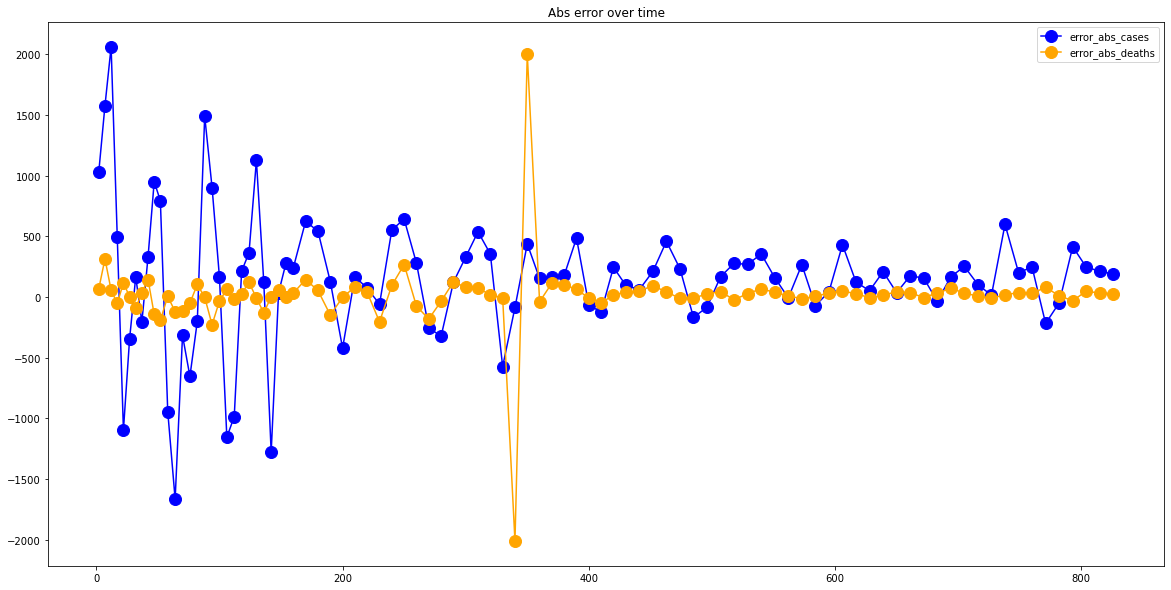

In [9]:
visShow("Italy")

-- Spain performances for cases --
MAPE =  898.2608695652174
RMSE =  2130.779904166547
-- Spain performances for deaths --
MAPE =  195.95652173913044
RMSE =  423.1377358239996


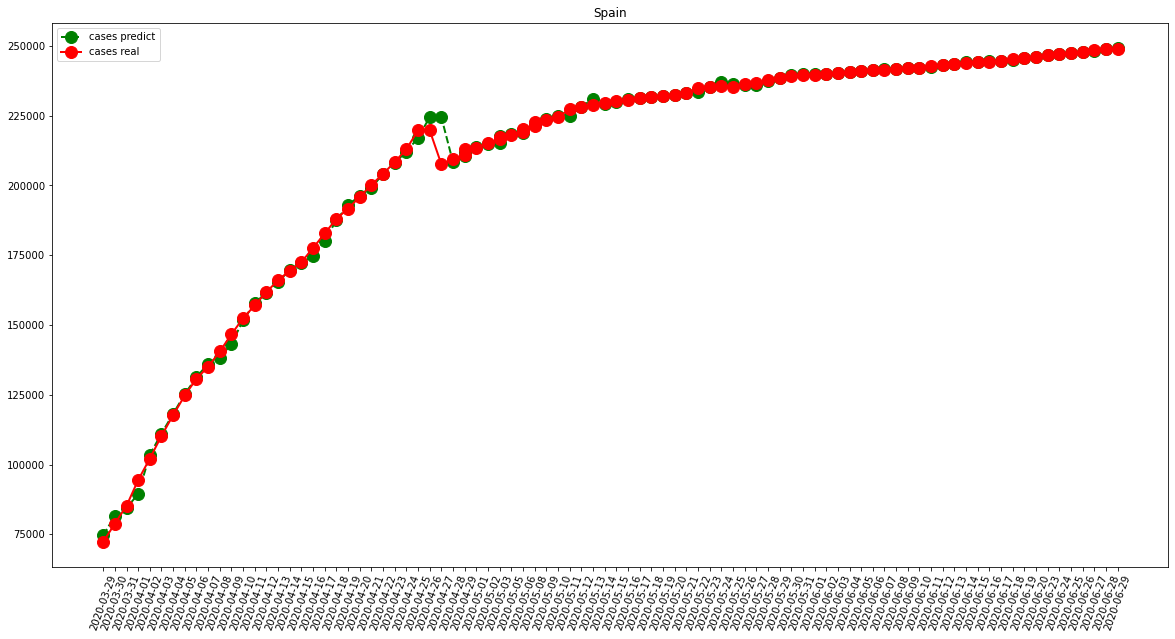

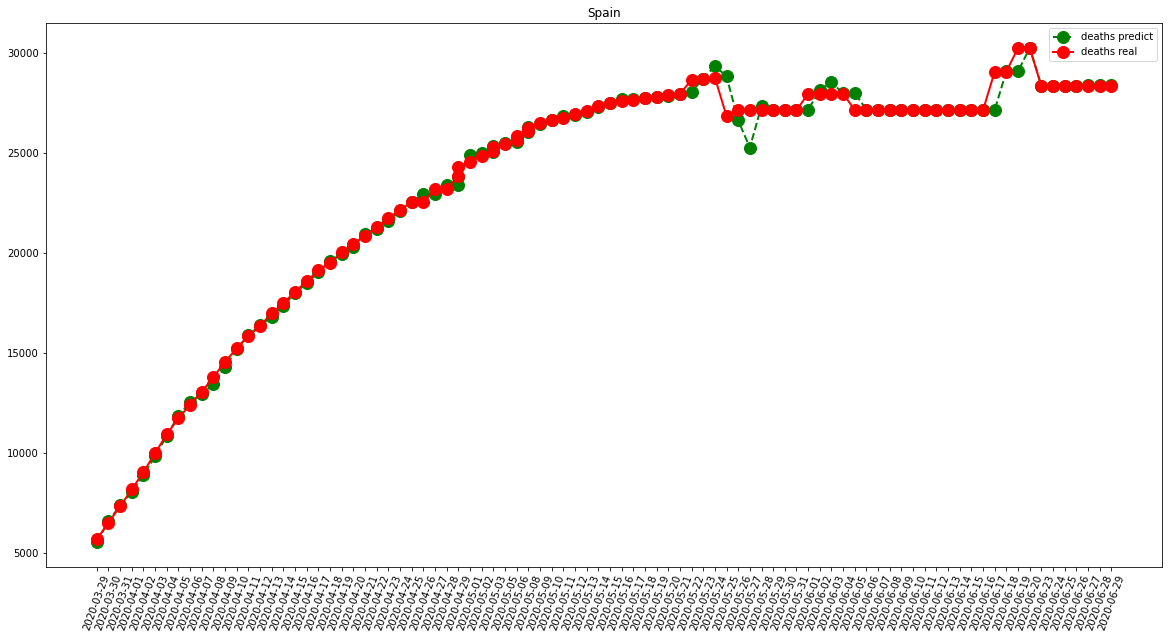

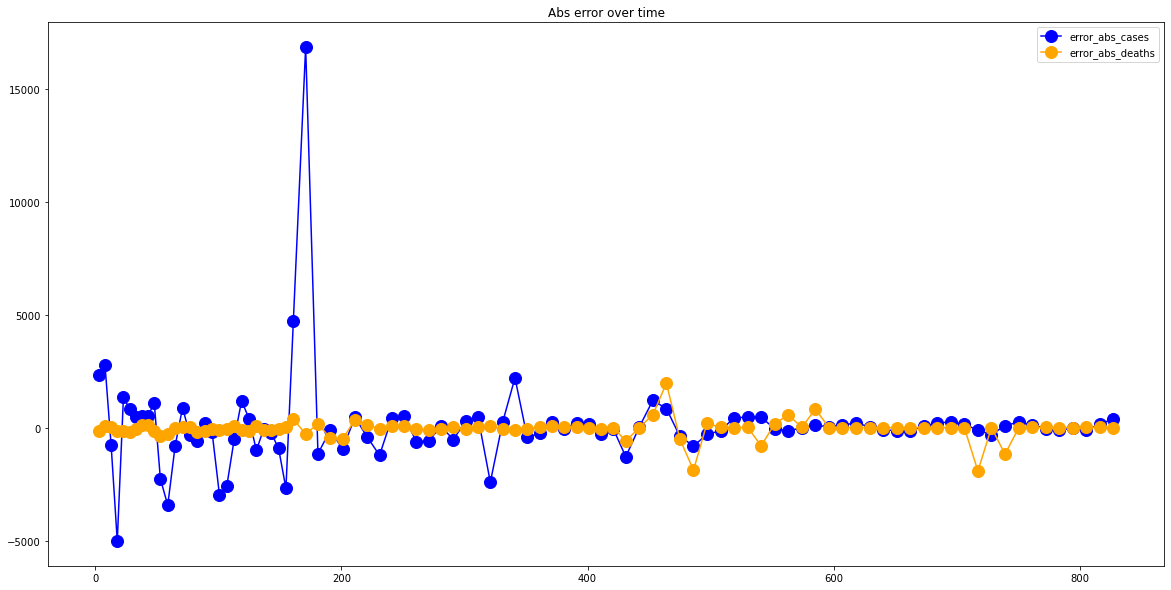

In [10]:
visShow("Spain")

-- United States performances for cases --
MAPE =  4665.489130434783
RMSE =  6463.148531919422
-- United States performances for deaths --
MAPE =  545.8478260869565
RMSE =  801.1160828874113


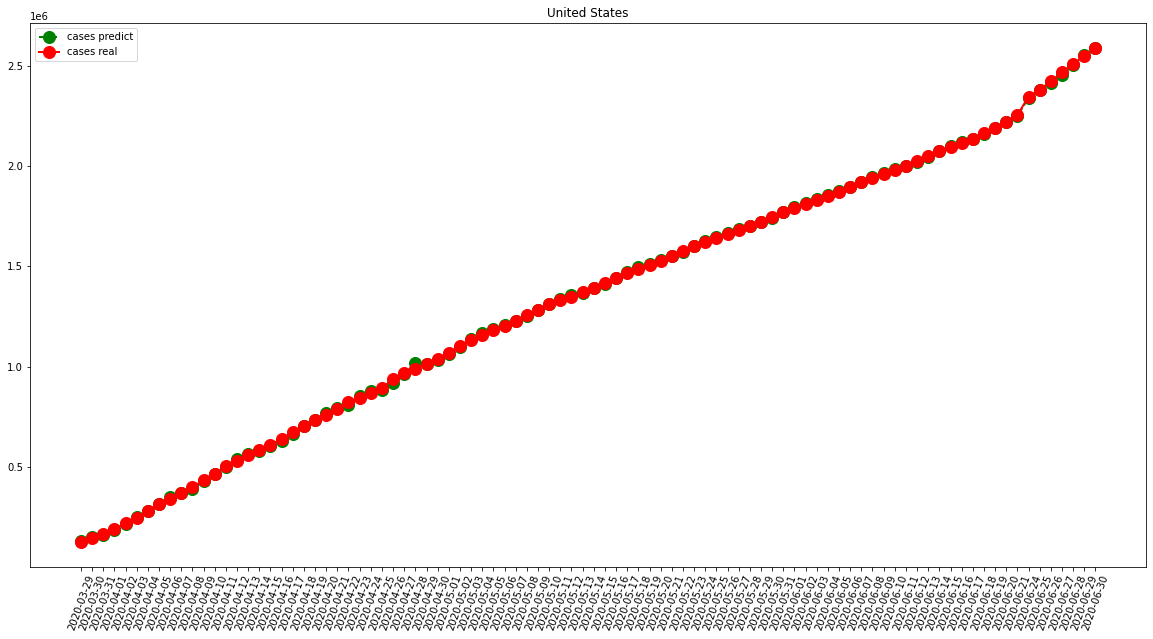

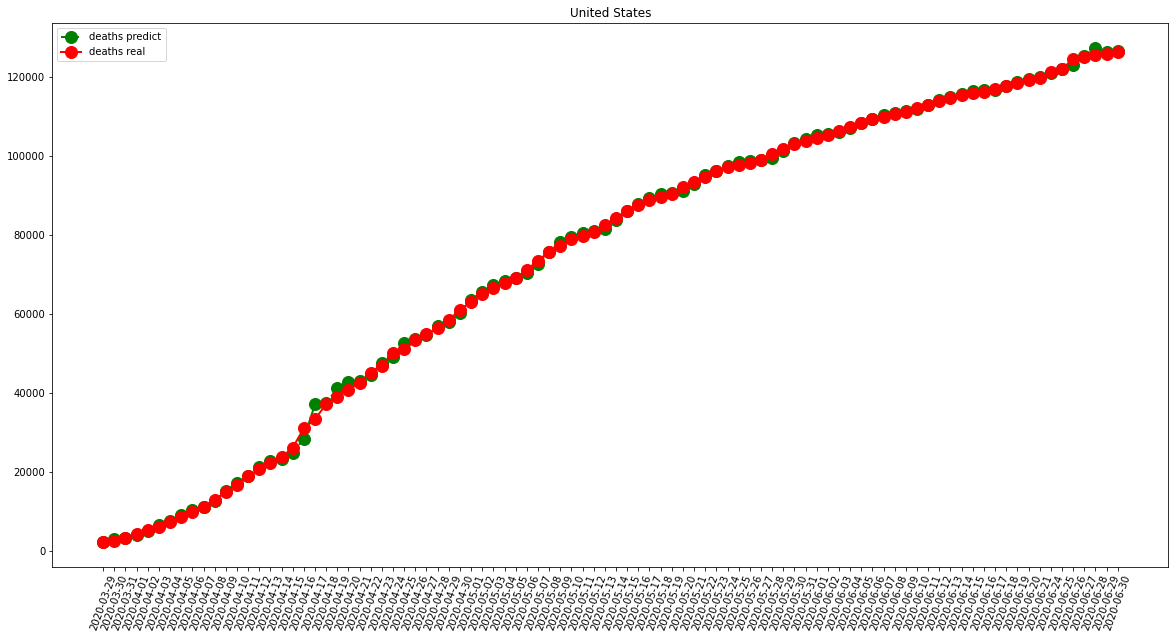

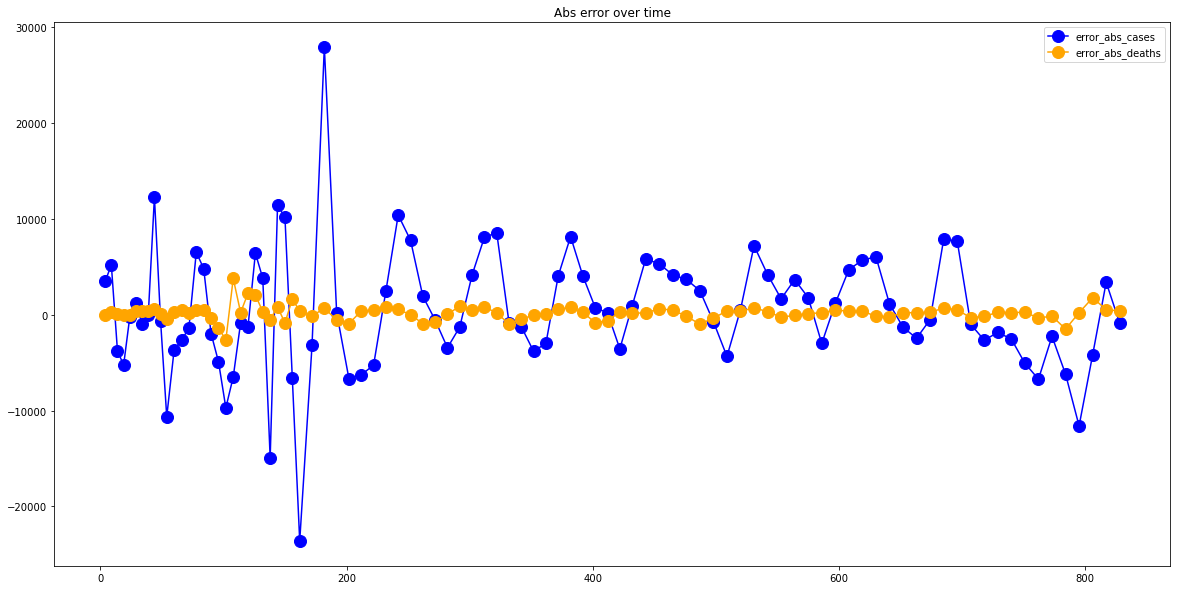

In [11]:
visShow("United States")

-- China performances for cases --
MAPE =  93.81521739130434
RMSE =  122.39036797850166
-- China performances for deaths --
MAPE =  40.91304347826087
RMSE =  163.6070318463275


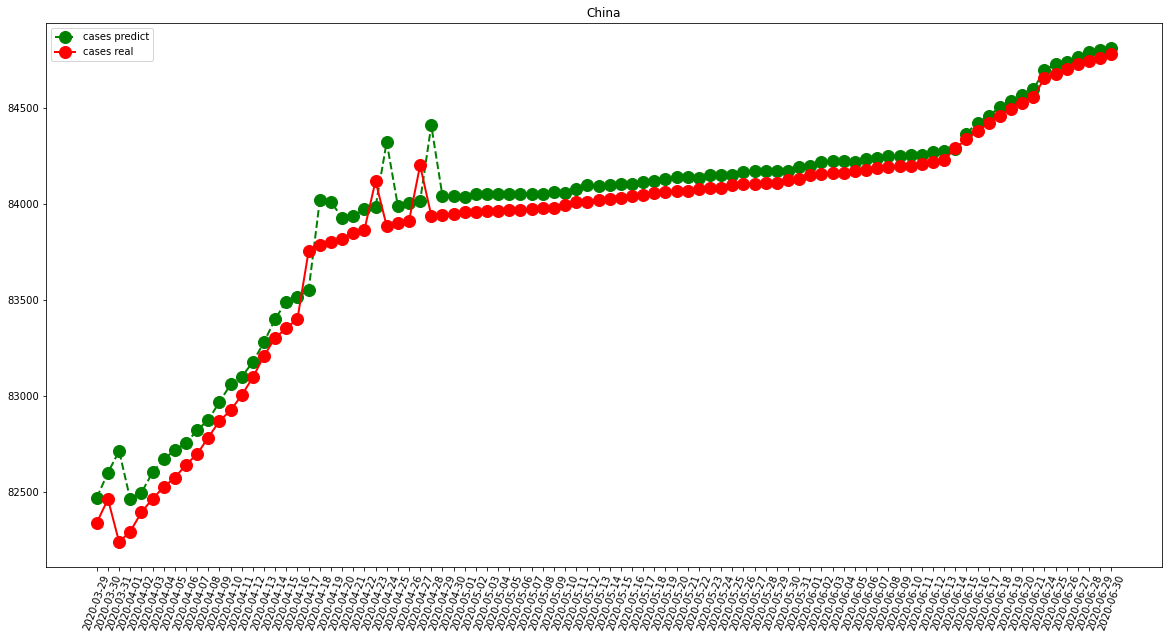

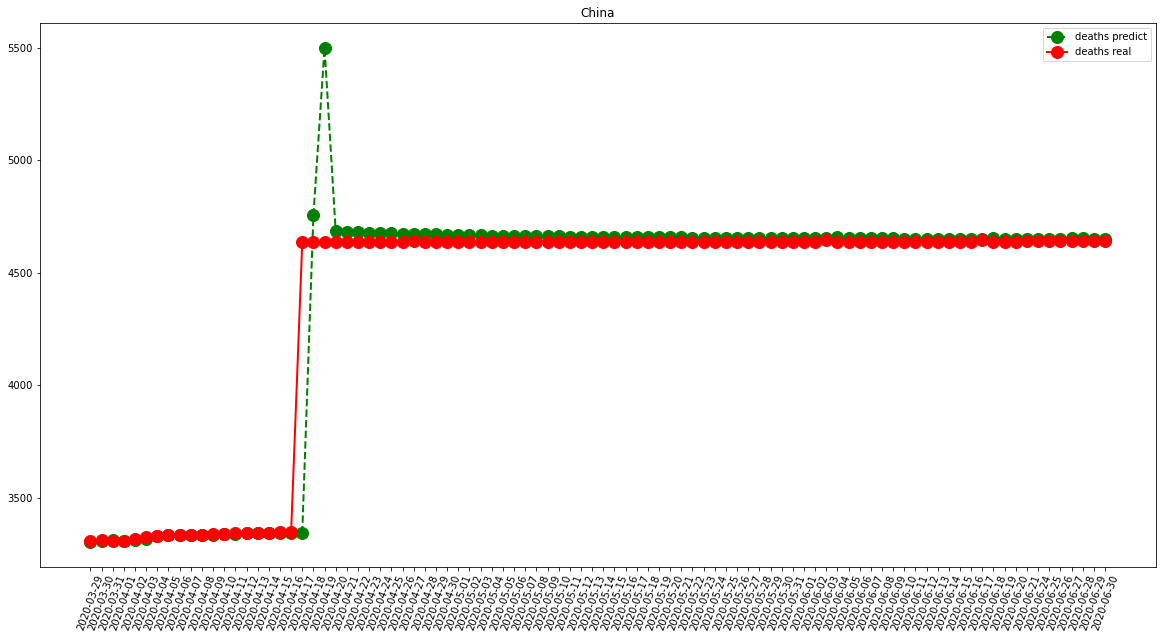

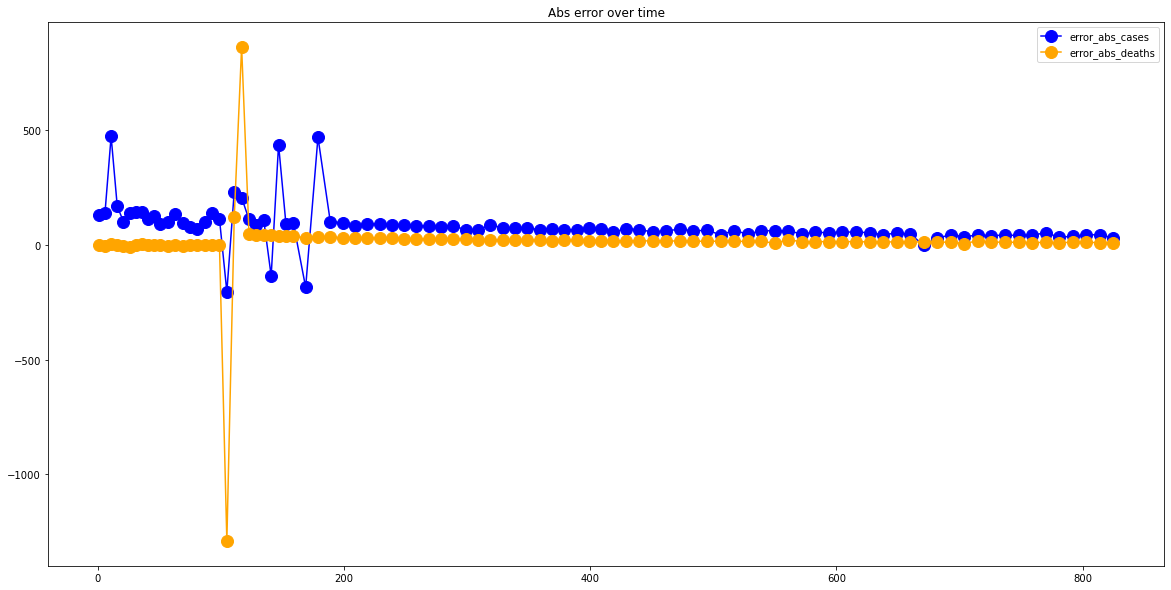

In [12]:
visShow("China")

-- United Kingdom performances for cases --
MAPE =  847.90625
RMSE =  1177.5212710392964
-- United Kingdom performances for deaths --
MAPE =  262.734375
RMSE =  610.4043357685133


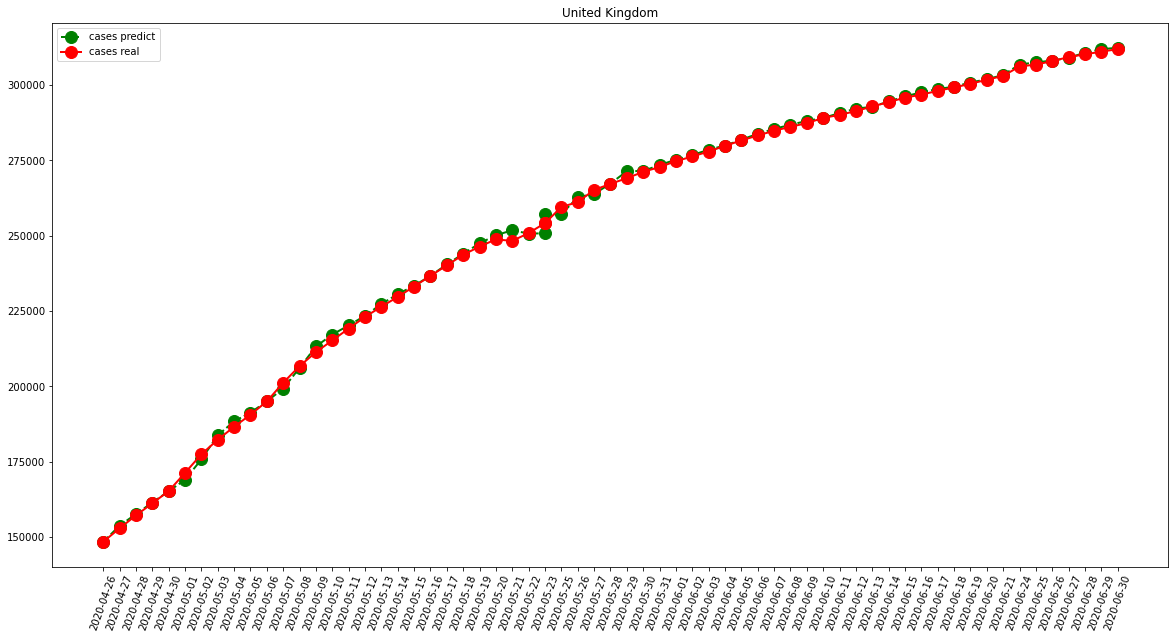

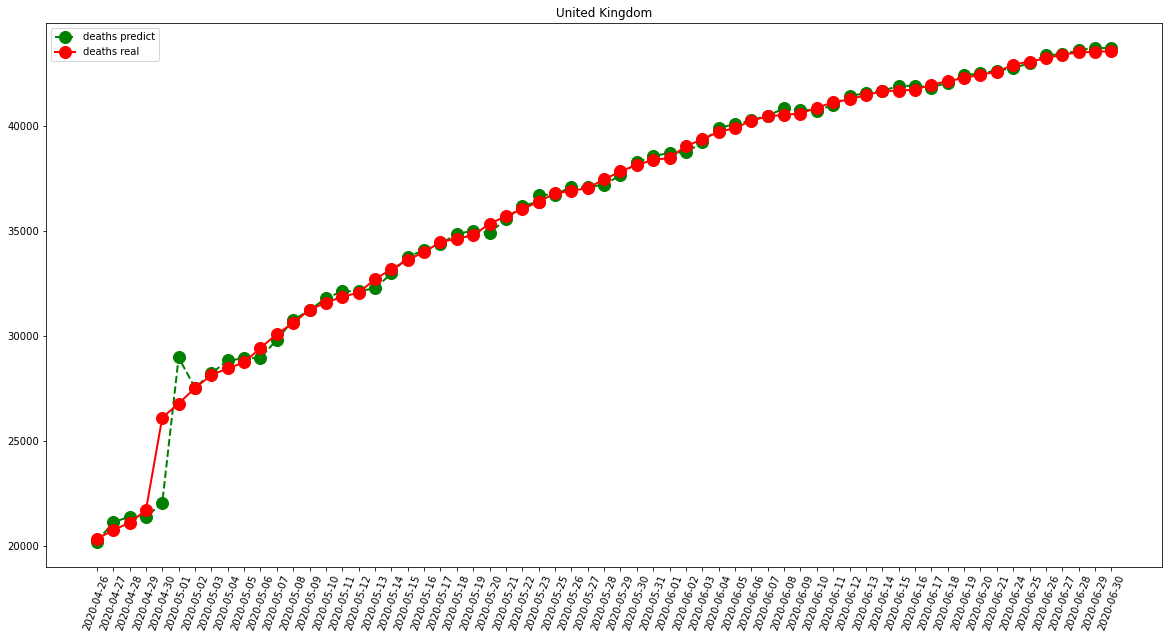

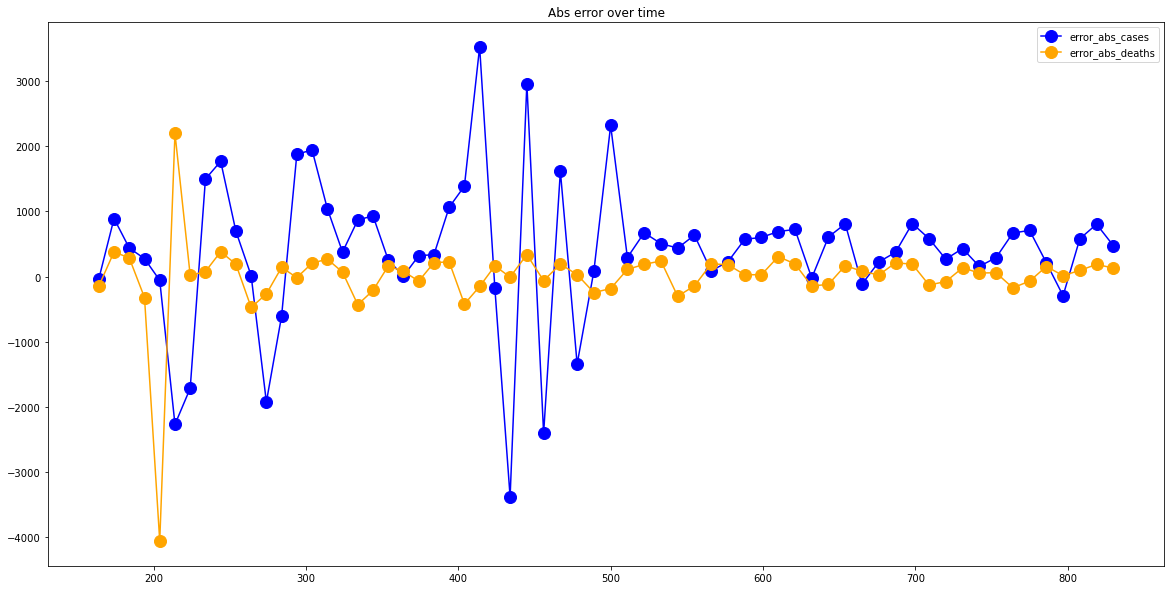

In [13]:
visShow("United Kingdom")

-- Germany performances for cases --
MAPE =  316.234375
RMSE =  451.3646149456113
-- Germany performances for deaths --
MAPE =  33.71875
RMSE =  54.20476224465891


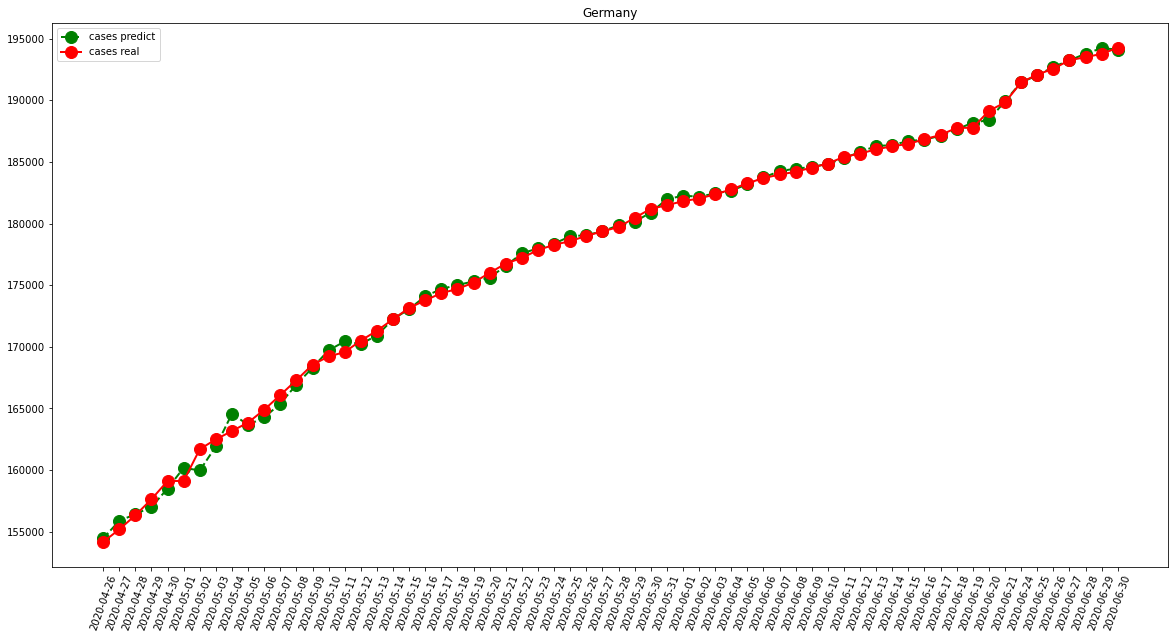

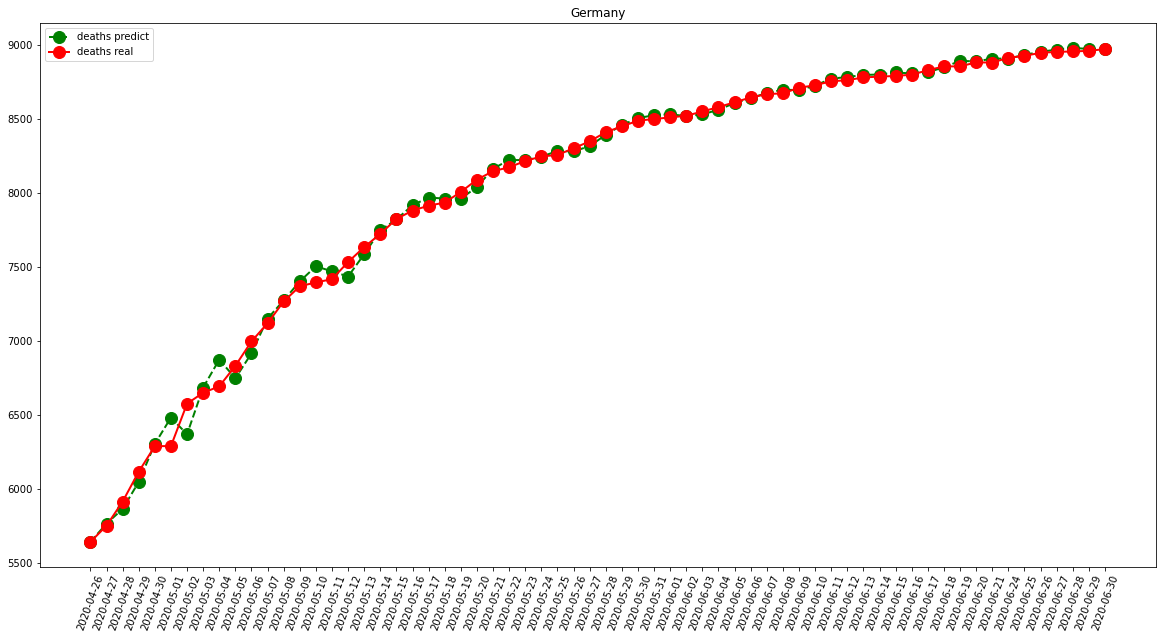

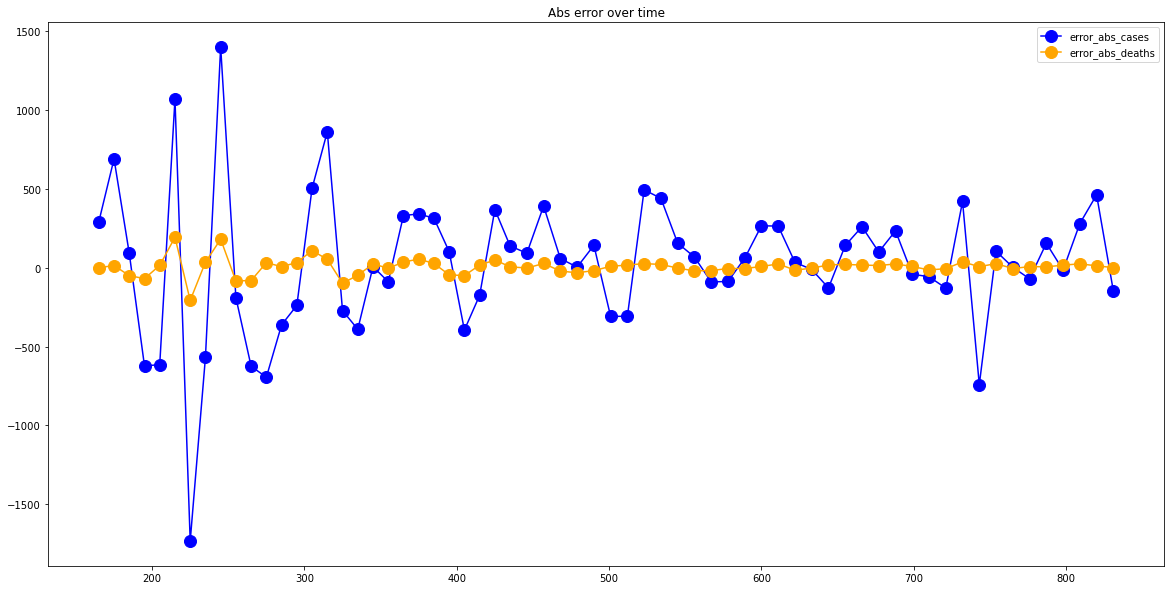

In [14]:
visShow("Germany")

-- Iran performances for cases --
MAPE =  264.5625
RMSE =  342.8150467088631
-- Iran performances for deaths --
MAPE =  18.109375
RMSE =  30.16180324516424


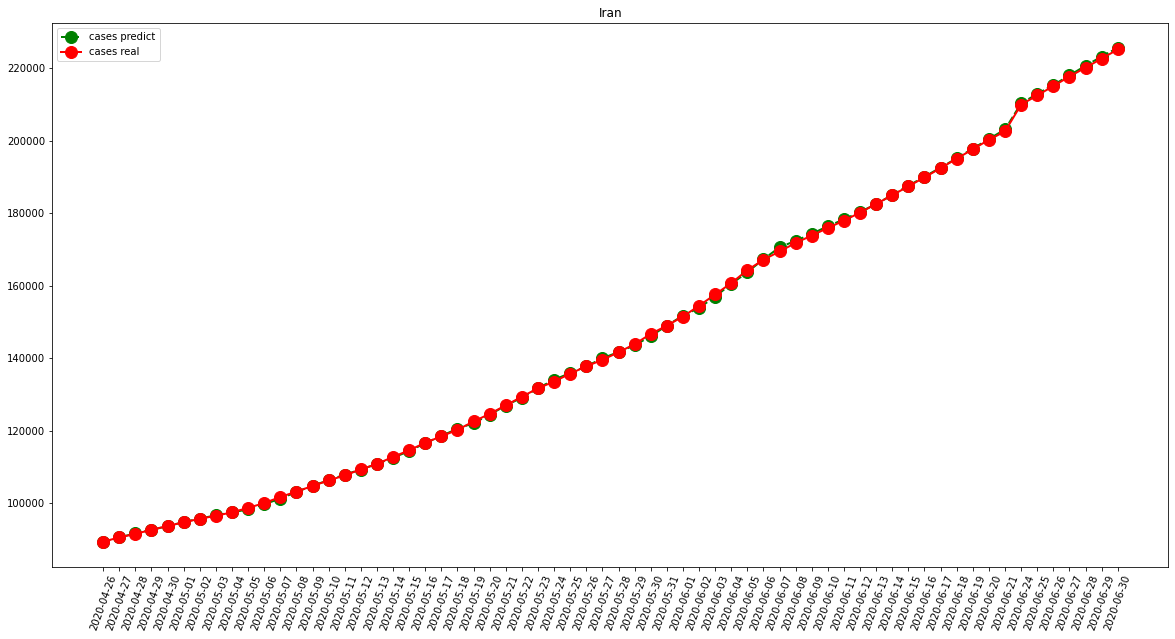

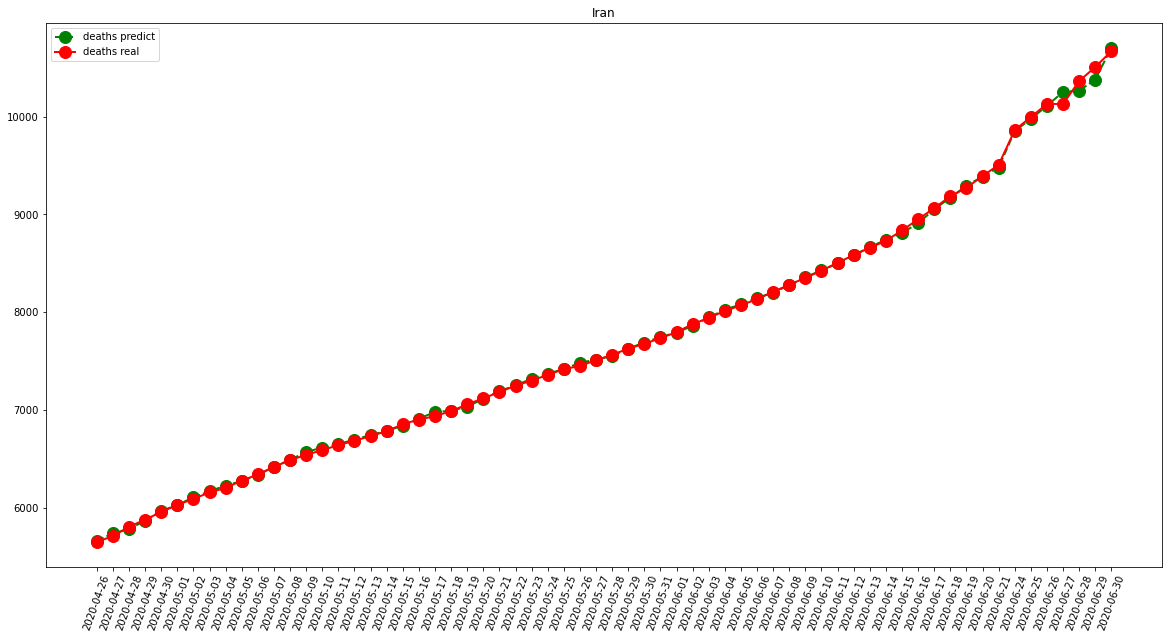

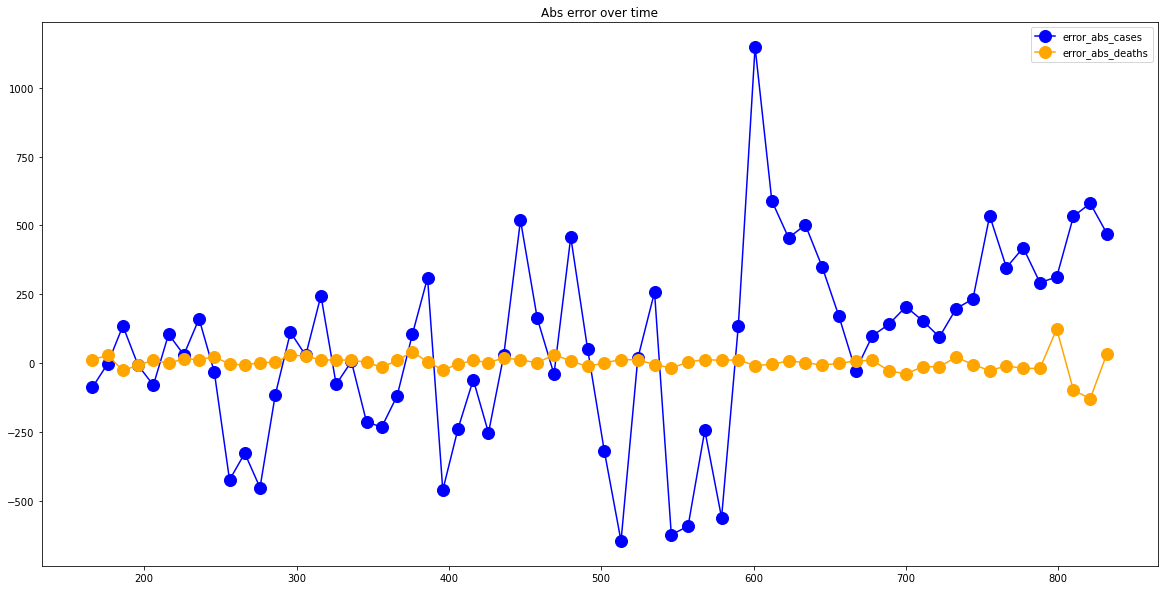

In [15]:
visShow("Iran")

-- Turkey performances for cases --
MAPE =  286.609375
RMSE =  428.9183889447968
-- Turkey performances for deaths --
MAPE =  28.5
RMSE =  126.87506157633973


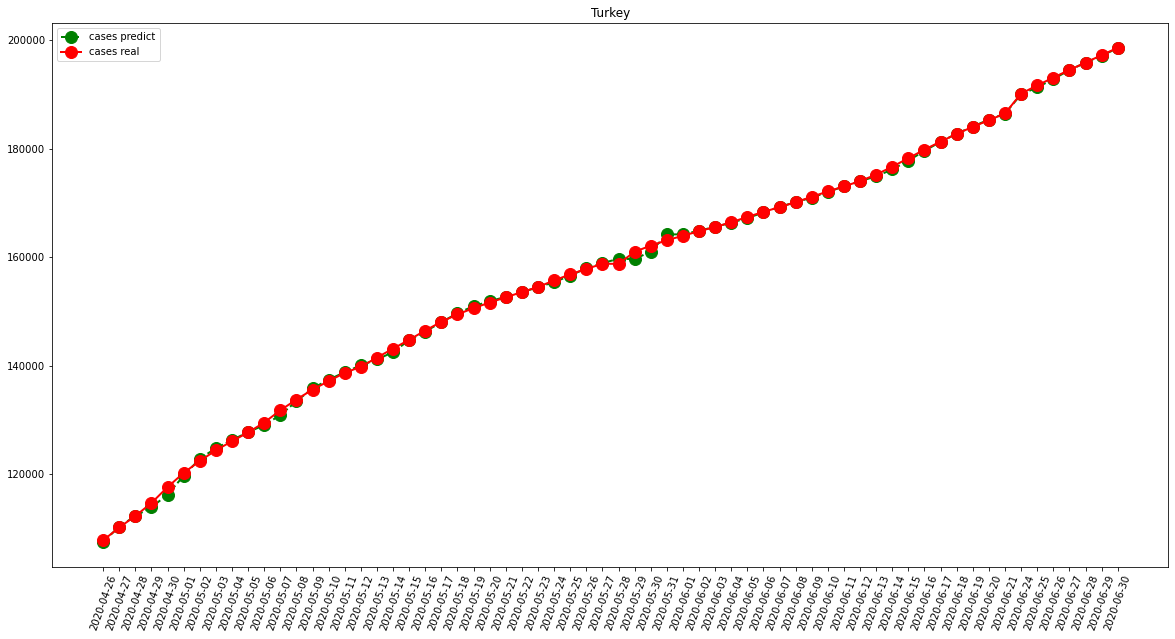

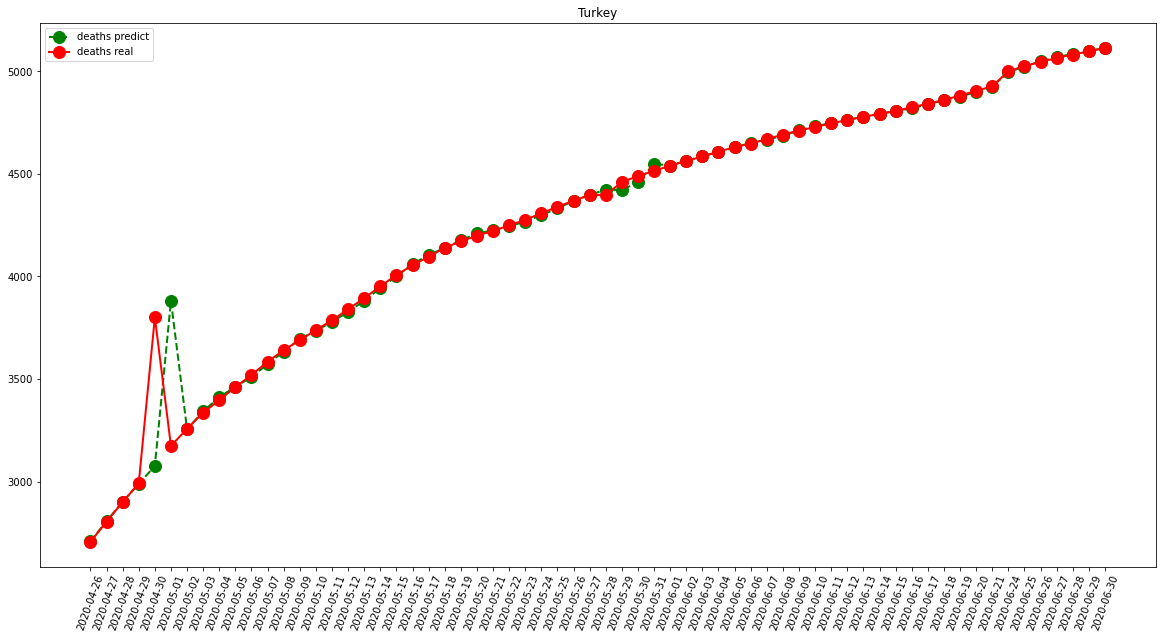

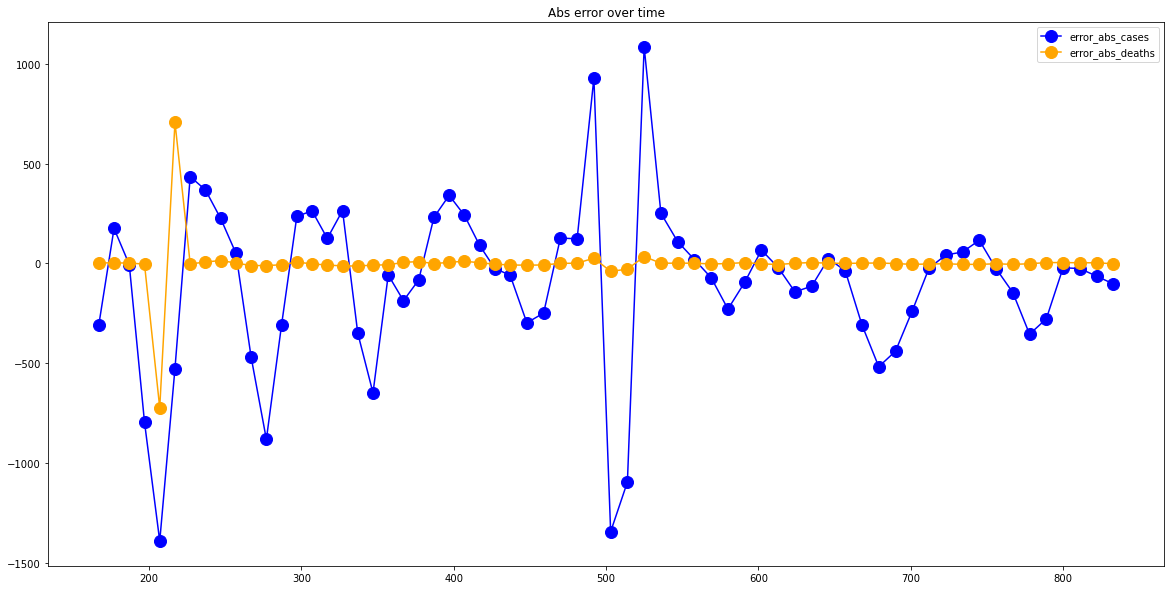

In [16]:
visShow("Turkey")

-- Brazil performances for cases --
MAPE =  8718.837837837838
RMSE =  11290.375649078169
-- Brazil performances for deaths --
MAPE =  391.18918918918916
RMSE =  478.6229120005559


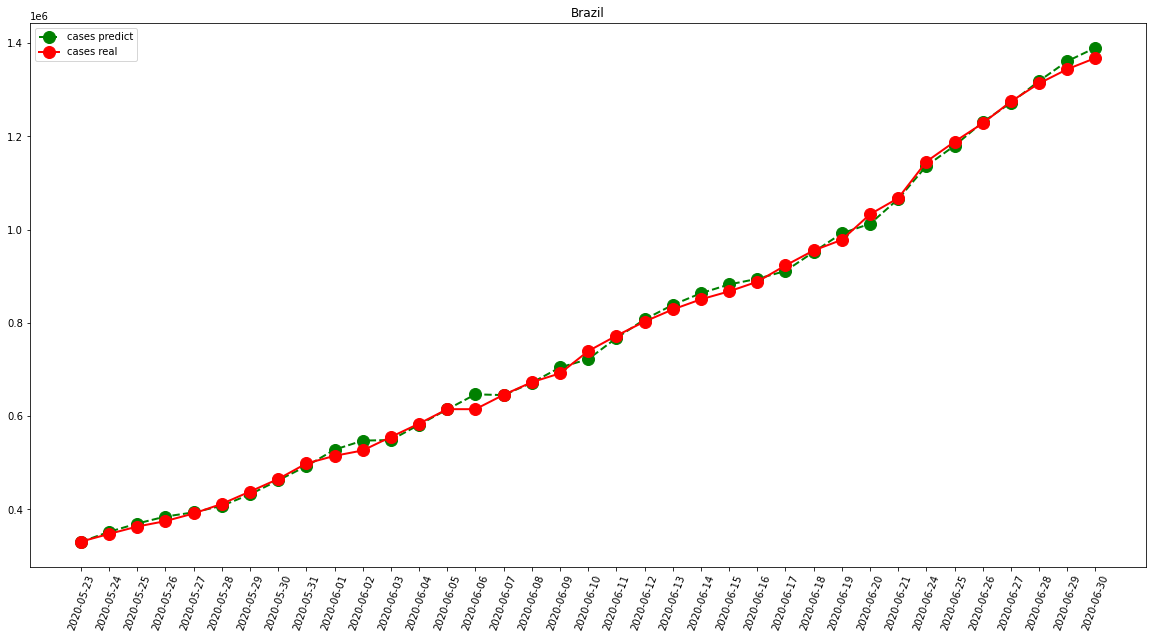

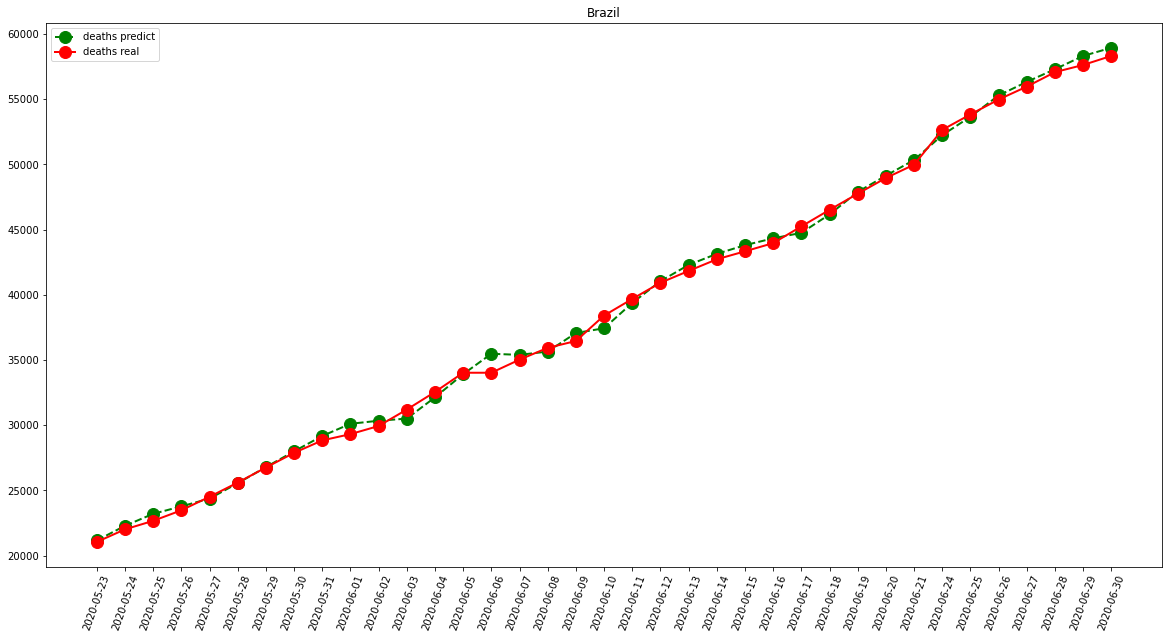

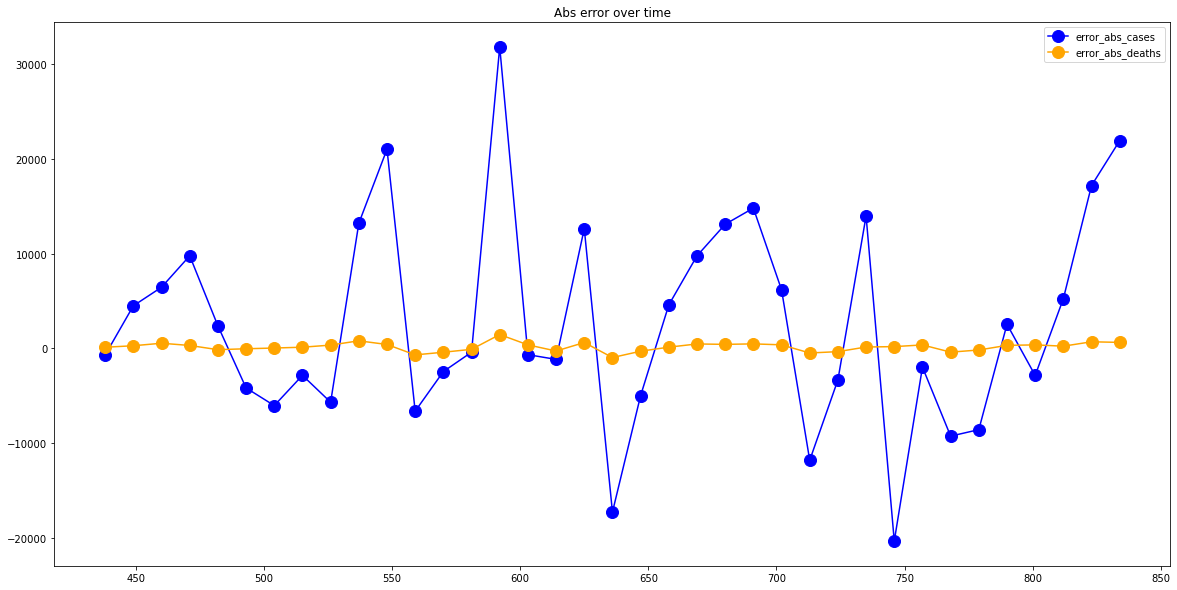

In [17]:
visShow("Brazil")

In [18]:
frame.to_csv(f"AzureSC\\Rapport\\Fullrap{date.today()}.csv")

The data's are sometimes corrected by the authorities, which causes deregulation of the curves and models (example China the 17-04, or France 05/06-04)